<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_2'

In [4]:
os.listdir(base_path)

['data_multi_delta_2_n20.csv',
 'data_multi_delta_2_n30.csv',
 'data_multi_delta_2_n60.csv',
 'data_multi_delta_2_n120.csv',
 'data_multi_delta_2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,70.619477,90.653070,61.634445,232.906993,171.435498,61.471495
1,0.0,1.0,94.106683,68.341107,122.071000,294.518790,175.901437,118.617354
2,0.0,2.0,98.038949,57.298054,-6.411838,158.925166,170.652569,-11.727403
3,0.0,3.0,80.736456,96.313032,-23.322335,163.727152,185.890297,-22.163145
4,0.0,4.0,85.104538,38.837748,50.939961,184.882248,142.961816,41.920432
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,65.843982,78.963213,-14.824683,139.982512,166.193182,-26.210670
119996,999.0,116.0,97.887962,71.591154,-110.276590,69.202526,191.866160,-122.663634
119997,999.0,117.0,93.205825,27.908383,22.806067,153.920274,137.002831,16.917443
119998,999.0,118.0,91.964142,70.903964,-16.123070,156.745036,184.779157,-28.034121


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,70.619477,90.653070,61.634445,232.906993,171.435498,61.471495
1,0.0,1.0,94.106683,68.341107,122.071000,294.518790,175.901437,118.617354
2,0.0,2.0,98.038949,57.298054,-6.411838,158.925166,170.652569,-11.727403
3,0.0,3.0,80.736456,96.313032,-23.322335,163.727152,185.890297,-22.163145
4,0.0,4.0,85.104538,38.837748,50.939961,184.882248,142.961816,41.920432
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,65.843982,78.963213,-14.824683,139.982512,166.193182,-26.210670
119996,999.0,116.0,97.887962,71.591154,-110.276590,69.202526,191.866160,-122.663634
119997,999.0,117.0,93.205825,27.908383,22.806067,153.920274,137.002831,16.917443
119998,999.0,118.0,91.964142,70.903964,-16.123070,156.745036,184.779157,-28.034121


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    70.619477  90.653070   61.634445  232.906993  171.435498   
      1.0    94.106683  68.341107  122.071000  294.518790  175.901437   
      2.0    98.038949  57.298054   -6.411838  158.925166  170.652569   
      3.0    80.736456  96.313032  -23.322335  163.727152  185.890297   
      4.0    85.104538  38.837748   50.939961  184.882248  142.961816   
...                ...        ...         ...         ...         ...   
999.0 115.0  65.843982  78.963213  -14.824683  139.982512  166.193182   
      116.0  97.887962  71.591154 -110.276590   69.202526  191.866160   
      117.0  93.205825  27.908383   22.806067  153.920274  137.002831   
      118.0  91.964142  70.903964  -16.123070  156.745036  184.779157   
      119.0  75.890156  90.308404   66.542348  242.740908  189.836454   

                  e_hat  
rep   index              
0.0   0.0     61.471495  
      1.0    118.617354  
      2.0    -11.727403  
      3.0    -22.163145  
      4.0     41.920432  
...                 ...  
999.0 115.0  -26.210670  
      116.0 -122.663634  
      117.0   16.917443  
      118.0  -28.034121  
      119.0   52.904454  

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    70.619477  90.653070   61.634445  232.906993  171.435498   
      1.0    94.106683  68.341107  122.071000  294.518790  175.901437   
      2.0    98.038949  57.298054   -6.411838  158.925166  170.652569   
      3.0    80.736456  96.313032  -23.322335  163.727152  185.890297   
      4.0    85.104538  38.837748   50.939961  184.882248  142.961816   
...                ...        ...         ...         ...         ...   
999.0 115.0  65.843982  78.963213  -14.824683  139.982512  166.193182   
      116.0  97.887962  71.591154 -110.276590   69.202526  191.866160   
      117.0  93.205825  27.908383   22.806067  153.920274  137.002831   
      118.0  91.964142  70.903964  -16.123070  156.745036  184.779157   
      119.0  75.890156  90.308404   66.542348  242.740908  189.836454   

                  e_hat  
rep   index              
0.0   0.0     61.471495  
      1.0    118.617354  
      2.0    -11.727403  
      3.0    -22.163145  
      4.0     41.920432  
...                 ...  
999.0 115.0  -26.210670  
      116.0 -122.663634  
      117.0   16.917443  
      118.0  -28.034121  
      119.0   52.904454  

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,70.619477,90.653070,61.634445,232.906993,171.435498,61.471495
1,0.0,1.0,94.106683,68.341107,122.071000,294.518790,175.901437,118.617354
2,0.0,2.0,98.038949,57.298054,-6.411838,158.925166,170.652569,-11.727403
3,0.0,3.0,80.736456,96.313032,-23.322335,163.727152,185.890297,-22.163145
4,0.0,4.0,85.104538,38.837748,50.939961,184.882248,142.961816,41.920432
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,65.843982,78.963213,-14.824683,139.982512,166.193182,-26.210670
119996,999.0,116.0,97.887962,71.591154,-110.276590,69.202526,191.866160,-122.663634
119997,999.0,117.0,93.205825,27.908383,22.806067,153.920274,137.002831,16.917443
119998,999.0,118.0,91.964142,70.903964,-16.123070,156.745036,184.779157,-28.034121


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    70.619477  90.653070   61.634445  232.906993  171.435498   
      1.0    94.106683  68.341107  122.071000  294.518790  175.901437   
      2.0    98.038949  57.298054   -6.411838  158.925166  170.652569   
      3.0    80.736456  96.313032  -23.322335  163.727152  185.890297   
      4.0    85.104538  38.837748   50.939961  184.882248  142.961816   
...                ...        ...         ...         ...         ...   
999.0 115.0  65.843982  78.963213  -14.824683  139.982512  166.193182   
      116.0  97.887962  71.591154 -110.276590   69.202526  191.866160   
      117.0  93.205825  27.908383   22.806067  153.920274  137.002831   
      118.0  91.964142  70.903964  -16.123070  156.745036  184.779157   
      119.0  75.890156  90.308404   66.542348  242.740908  189.836454   

                  e_hat  
rep   index              
0.0   0.0     61.471495  
      1.0    118.617354  
      2.0    -11.727403  
      3.0    -22.163145  
      4.0     41.920432  
...                 ...  
999.0 115.0  -26.210670  
      116.0 -122.663634  
      117.0   16.917443  
      118.0  -28.034121  
      119.0   52.904454  

[120000 rows x 6 columns]

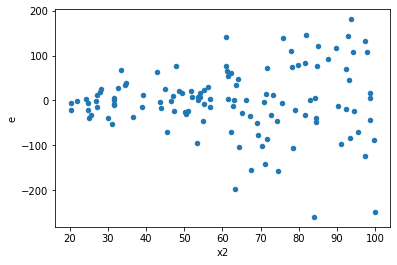

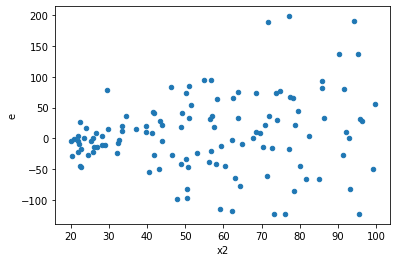

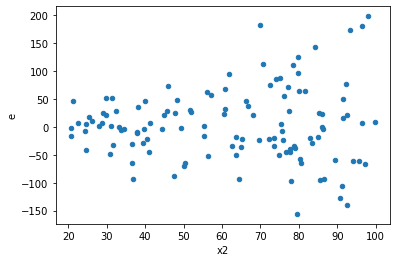

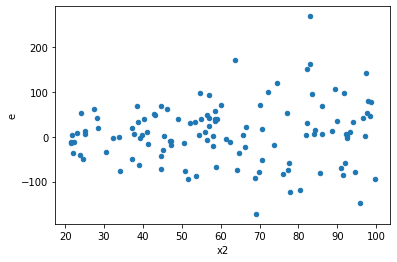

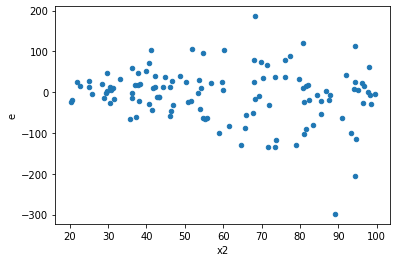

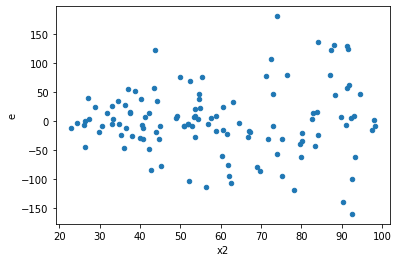

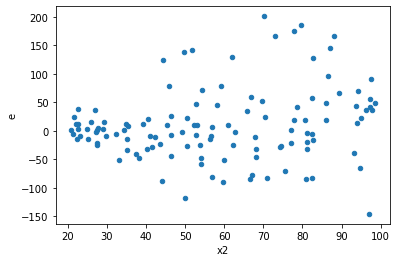

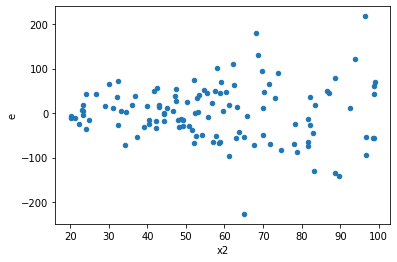

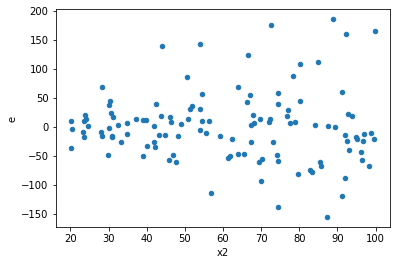

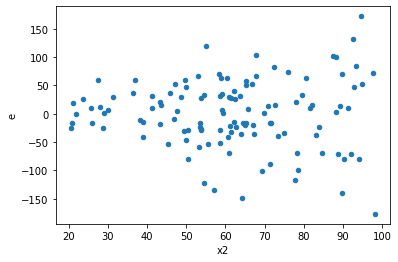

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,46.0,46.0,79837.54896106428,430743.3703977001,1735.5988904579192,9363.98631299348,5.3952479253561245,6.849805589403957e-08,0.999999965750972,3.4249027947019783e-08,Reject005=0 : Heteroscedasticity
1.0,46.0,46.0,64182.544170709225,201532.2928647504,1395.272699363244,4381.136801407617,3.139986042446772,0.0001688369300225645,0.9999155815349887,8.441846501128225e-05,Reject005=0 : Heteroscedasticity
2.0,46.0,46.0,70382.07483676037,302556.67360707046,1530.0451051469645,6577.3189914580535,4.298774571633485,2.306455680667341e-06,0.9999988467721597,1.1532278403336704e-06,Reject005=0 : Heteroscedasticity
3.0,46.0,46.0,74163.49083398722,526895.460588294,1612.2498007388526,11454.249143223782,7.104512674136846,6.544129682595212e-10,0.9999999996727935,3.272064841297606e-10,Reject005=0 : Heteroscedasticity
4.0,46.0,46.0,78478.20227738988,396382.1938466352,1706.047875595432,8617.004214057286,5.0508572105866865,1.9640047543845185e-07,0.9999999017997623,9.820023771922592e-08,Reject005=0 : Heteroscedasticity
5.0,46.0,46.0,61331.266596331276,358247.22947161493,1333.2884042680712,7787.9832493829335,5.84118426624903,1.8647946076200128e-08,0.999999990676027,9.323973038100064e-09,Reject005=0 : Heteroscedasticity
6.0,46.0,46.0,46170.92199769814,251652.43076088862,1003.7156956021335,5470.7050165410565,5.450452793068217,5.809007386226028e-08,0.9999999709549631,2.904503693113014e-08,Reject005=0 : Heteroscedasticity
7.0,46.0,46.0,71918.63536067968,257677.11639753383,1563.4485947973842,5601.676443424649,3.5828977441695806,3.0329225894520917e-05,0.9999848353870527,1.5164612947260458e-05,Reject005=0 : Heteroscedasticity
8.0,46.0,46.0,38942.15139773387,289784.41473104584,846.5685086463884,6299.661189805344,7.441407429480361,2.882198923970236e-10,0.99999999985589,1.441099461985118e-10,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,79837.54896106428,430743.3703977001,1735.5988904579192,9363.98631299348,5.3952479253561245,6.849805589403957e-08,Reject005=0 : Heteroscedasticity
1.0,46.0,46.0,64182.544170709225,201532.2928647504,1395.272699363244,4381.136801407617,3.139986042446772,0.0001688369300225645,Reject005=0 : Heteroscedasticity
2.0,46.0,46.0,70382.07483676037,302556.67360707046,1530.0451051469645,6577.3189914580535,4.298774571633485,2.306455680667341e-06,Reject005=0 : Heteroscedasticity
3.0,46.0,46.0,74163.49083398722,526895.460588294,1612.2498007388526,11454.249143223782,7.104512674136846,6.544129682595212e-10,Reject005=0 : Heteroscedasticity
4.0,46.0,46.0,78478.20227738988,396382.1938466352,1706.047875595432,8617.004214057286,5.0508572105866865,1.9640047543845185e-07,Reject005=0 : Heteroscedasticity
5.0,46.0,46.0,61331.266596331276,358247.22947161493,1333.2884042680712,7787.9832493829335,5.84118426624903,1.8647946076200128e-08,Reject005=0 : Heteroscedasticity
6.0,46.0,46.0,46170.92199769814,251652.43076088862,1003.7156956021335,5470.7050165410565,5.450452793068217,5.809007386226028e-08,Reject005=0 : Heteroscedasticity
7.0,46.0,46.0,71918.63536067968,257677.11639753383,1563.4485947973842,5601.676443424649,3.5828977441695806,3.0329225894520917e-05,Reject005=0 : Heteroscedasticity
8.0,46.0,46.0,38942.15139773387,289784.41473104584,846.5685086463884,6299.661189805344,7.441407429480361,2.882198923970236e-10,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    999
Reject005=1 : Homoscedasticity        1
Name: Result_test, dtype: int64